In [1]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json 

In [4]:
! kaggle datasets download nikitarom/planets-dataset

planets-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
! unzip planets-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: test-jpg-additional/test-jpg-additional/file_5499.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_55.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_550.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5500.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5501.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5502.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5503.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5504.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5505.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5506.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5507.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5508.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5509.jpg  
  inflating: test-jpg-additional/test-jpg-additional/fi

# Importing libraries

In [6]:
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Input, MaxPool2D, Concatenate, GlobalAvgPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import tensorflow.keras.backend as k
import tempfile

# Loading dataset and preprocessing

In [7]:
import pandas as pd
dataset = pd.read_csv('planet/planet/train_classes.csv')

In [8]:
y = []
for data in dataset.iloc[:,0]:
  x = data.replace(data, data + '.jpg')
  y.append(x)

In [9]:
# replacing 1st column with jpg extension
dataset.iloc[:,0] = y

ValueError: ignored

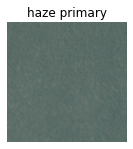

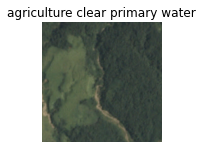

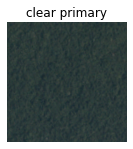

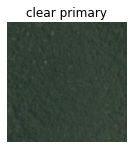

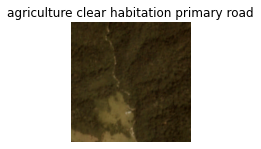

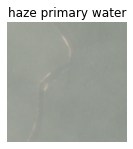

<Figure size 1080x432 with 0 Axes>

In [10]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import PIL

%matplotlib inline

satellite = os.listdir('/content/planet/planet/train-jpg')
folder = []
for file, name in zip(dataset.iloc[:,0], dataset.iloc[:,1]):
    image = r'/content/planet/planet/train-jpg' + '/' + file
    folder.append([image, name])
    
for num, x in enumerate(folder):
    img = PIL.Image.open(x[0])
    plt.figure(figsize=(15,6))
    plt.subplot(1,6,num+1)
    plt.axis('off')
    plt.title(x[1])
    plt.imshow(img)

In [11]:

train_augmentation = ImageDataGenerator(rescale=1./227,zoom_range=0.2,shear_range=0.2,horizontal_flip=True, validation_split=0.2)
test_augmentation = ImageDataGenerator(rescale=1./227)

In [12]:
final_train = train_augmentation.flow_from_dataframe(dataset, directory=r'/content/planet/planet/train-jpg', x_col='image_name', y_col='tags', target_size=(227,227), subset='training', batch_size=100)
final_val = train_augmentation.flow_from_dataframe(dataset, directory=r'/content/planet/planet/train-jpg', x_col='image_name', y_col='tags', target_size=(227,227), subset='validation', batch_size=100)

Found 32384 validated image filenames belonging to 449 classes.
Found 8095 validated image filenames belonging to 449 classes.


# Inception V3 model

In [13]:
from tensorflow.keras.applications import InceptionV3
inc=InceptionV3(input_shape=(227, 227, 3), weights='imagenet', include_top=False)


In [14]:
for i in inc.layers:
    i.trainable=False

In [15]:
x=Flatten()(inc.output)

In [16]:
pred=Dense(449,activation='softmax')(x)
model = Model(inc.input, pred)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 113, 113, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 113, 113, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',  metrics=['accuracy'])

In [19]:
winceptionv3_model = model.fit(final_train,epochs=6,validation_data=final_val,steps_per_epoch=len(final_train), validation_steps=len(final_val))

Epoch 1/6
324/324 [==============================] - 489s 1s/step - loss: 8.7961 - accuracy: 0.4774 - val_loss: 9.0583 - val_accuracy: 0.4813
Epoch 2/6
324/324 [==============================] - 483s 1s/step - loss: 7.4467 - accuracy: 0.5163 - val_loss: 10.5423 - val_accuracy: 0.4716
Epoch 3/6
324/324 [==============================] - 471s 1s/step - loss: 6.8620 - accuracy: 0.5416 - val_loss: 10.5657 - val_accuracy: 0.5225
Epoch 4/6
324/324 [==============================] - 494s 2s/step - loss: 6.2838 - accuracy: 0.5655 - val_loss: 11.4309 - val_accuracy: 0.4950
Epoch 5/6
324/324 [==============================] - 496s 2s/step - loss: 6.0781 - accuracy: 0.5753 - val_loss: 12.6405 - val_accuracy: 0.5076
Epoch 6/6
324/324 [==============================] - 466s 1s/step - loss: 5.7195 - accuracy: 0.5922 - val_loss: 13.0957 - val_accuracy: 0.5023


# Baseline 

In [28]:
_, baseline_model_accuracy = model.evaluate(
    final_val, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)

KeyboardInterrupt: ignored

In [38]:
submission = pd.read_csv('planet/planet/sample_submission.csv')
submission

,image_name,tags
0,test_0,primary clear agriculture road water
1,test_1,primary clear agriculture road water
2,test_2,primary clear agriculture road water
3,test_3,primary clear agriculture road water
4,test_4,primary clear agriculture road water
...,...,...
61186,file_9995,primary clear agriculture road water
61187,file_9996,primary clear agriculture road water
61188,file_9997,primary clear agriculture road water
61189,file_9998,primary clear agriculture road water


In [39]:
y = []
for data in submission.iloc[:,0]:
  x = data.replace(data, data + '.jpg')
  y.append(x)

In [41]:
submission.iloc[:,0] = y

In [42]:
test_1 = ImageDataGenerator(rescale=1./227)
final_test_1 = test_1.flow_from_dataframe(submission, directory='/content/planet/planet/test-jpg',x_col='image_name', y_col='tags', target_size=(227,227), batch_size=100)
test_2 = ImageDataGenerator(rescale=1./227)
final_test_2 = test_2.flow_from_dataframe(submission, directory='/content/test-jpg-additional/test-jpg-additional',x_col='image_name', y_col='tags', target_size=(227,227), batch_size=100)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 20522 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 40669 validated image filenames belonging to 1 classes.
Found 20522 validated image filenames belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 40669 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [46]:
holdout_data = final_test_1
predictions1 = model.predict(holdout_data)
submission1_df = {"Image_name": holdout_data,
                 "tags": predictions1}

In [1]:
submission = pd.DataFrame(submission1_df)
submission.to_csv(filename,index=False)

NameError: ignored